<a href="https://colab.research.google.com/github/cguillermo79/cguillermo2/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Normalidad
$$
H_0: \text{Los datos provienen de una población con distribución normal} \\
H_1: \text{Los datos NO provienen de una población con distribución normal}
$$



Estadistico de Shapiro-Wilk: 0.9992796413266116
Valor p: 0.6555892158056261


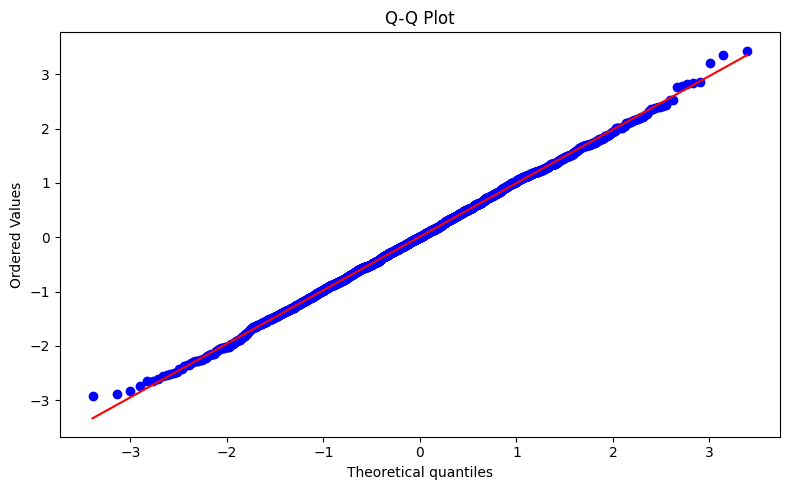

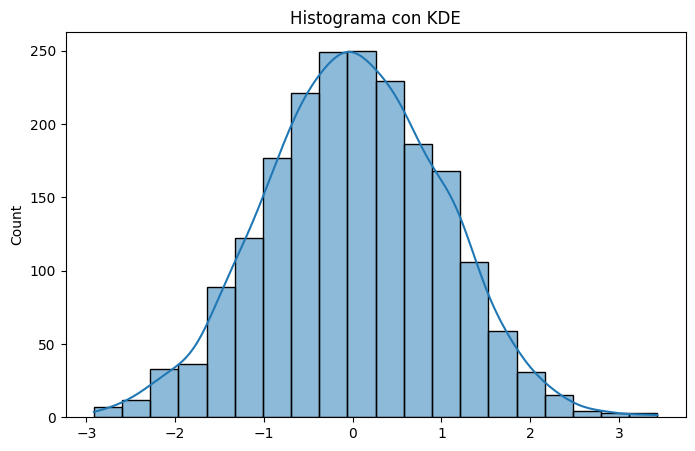

In [ ]:
# Importar librerias necesarias
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Generar datos de ejemplo
# data = np.random.normal(size=10)
#data = np.random.uniform(low=0.0, high=1.0, size=50)
data = np.random.normal(loc=0.0, scale=1.0, size=2000)
# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(data)
print(f"Estadistico de Shapiro-Wilk: {stat}")
print(f"Valor p: {p_value}")
# print(f"Conclusion: Los datos 'no' if p_value < 0.05 else ''siguen una distribucion normal)
# Q-Q Plot
fig, ax = plt.subplots(figsize=(8, 5))
stats.probplot(data, plot=ax)
plt.title("Q-Q Plot")
plt.tight_layout()
plt.show()
# Histograma con KDE
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=20)
plt.title("Histograma con KDE")
plt.show()

# 2) Análisis de frecuencia


/tmp/ipython-input-3686266418.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Tabla de frecuencias:
            frequency
species              
setosa             50
versicolor         50
virginica          50


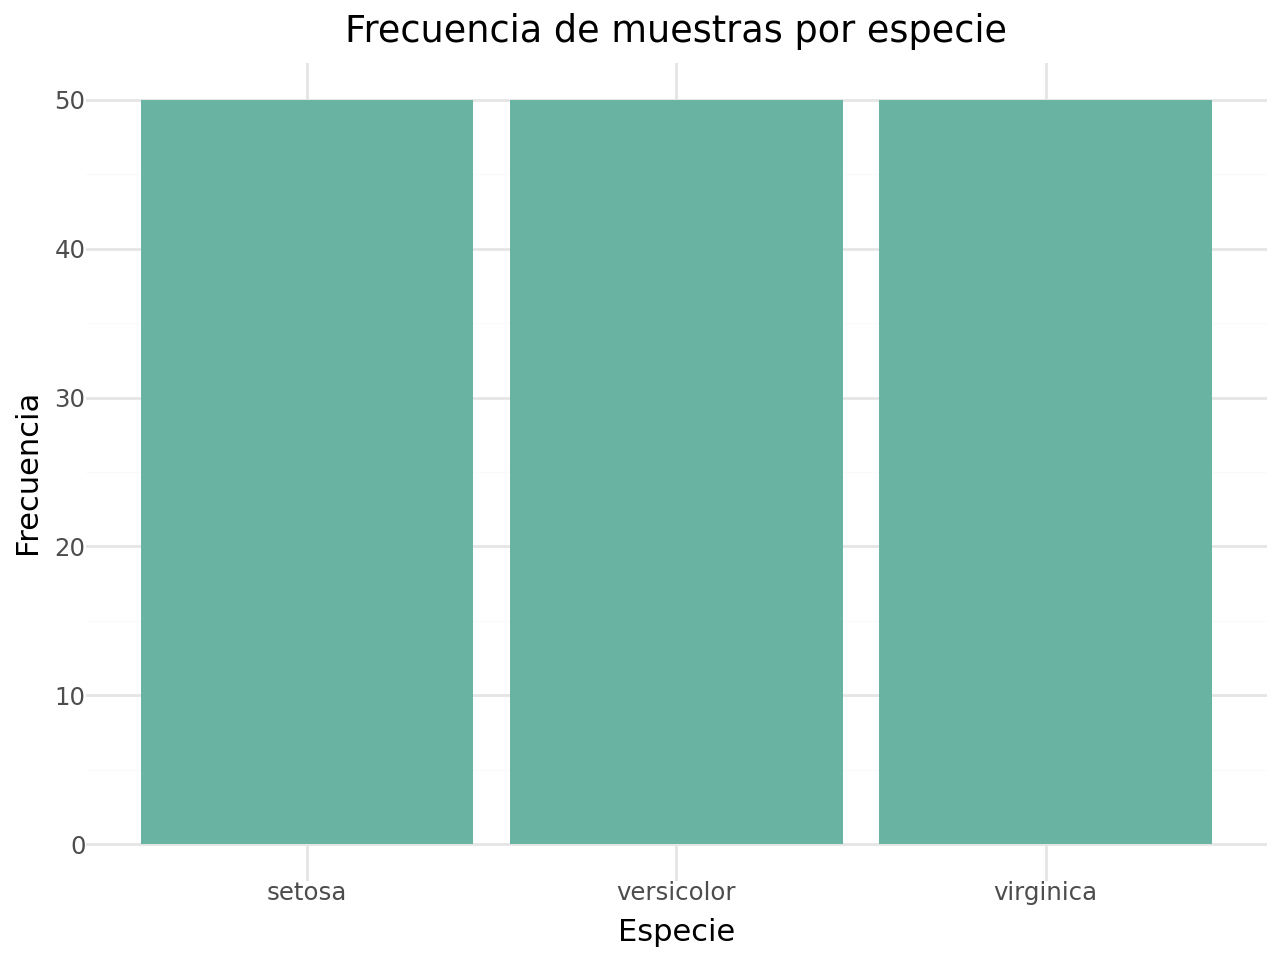

In [ ]:
# Instalar plotnine si no esta presente
!pip install plotnine
# Importar librer\'ias necesarias
import pandas as pd
from plotnine import *
from sklearn.datasets import load_iris
# Cargar dataset iris
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
# Tabla de frecuencias por especie
freq_table = iris.groupby("species").agg(frequency=("species", "count"))
print("Tabla de frecuencias:")
print(freq_table)
# Preparar datos para graficar
freq_by_species = freq_table.reset_index()
# Crear y mostrar grafico de barras
plot = (
ggplot(freq_by_species, aes(x="species", y="frequency")) +
geom_bar(stat='identity', fill="#69b3a2") +
theme_minimal() +
labs(title="Frecuencia de muestras por especie",
x="Especie",
y="Frecuencia")
)
plot


# 3) Tablas de contigencia

In [ ]:
import pandas as pd
# Datos de ejemplo
data = {'Genero': ['Hombre','Hombre', 'Mujer', 'Hombre', 'Mujer', 'Hombre'],
'Fumador': ['Si', 'No', 'No', 'Si', 'Si', 'Si']}
df = pd.DataFrame(data)
# Crear tabla de contingencia (frecuencias absolutas)
tabla_contingencia = pd.crosstab(df['Genero'], df['Fumador'])
print(tabla_contingencia)
# Tabla con porcentajes por fila (distribucion relativa)
tabla_porcentajes = pd.crosstab(df['Genero'], df['Fumador'],
normalize='index')
print(tabla_porcentajes)

Fumador  No  Si
Genero         
Hombre    1   3
Mujer     1   1
Fumador    No    Si
Genero             
Hombre   0.25  0.75
Mujer    0.50  0.50


#4) Estadísticas descriptivas

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Estadisticos descriptivos:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000 

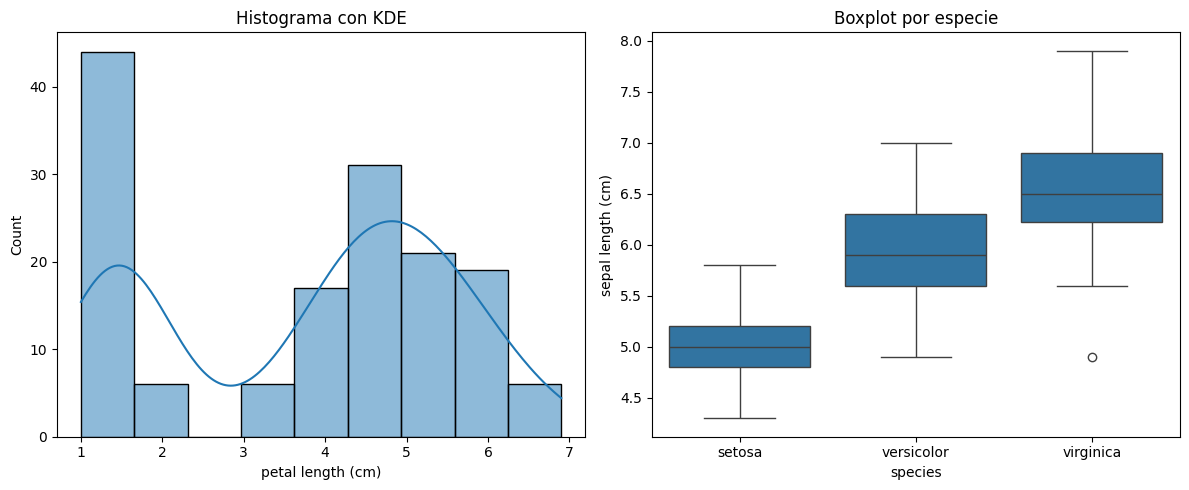

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
# Cargar el dataset iris
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
print(iris.head())
iris["species"] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
# Estadisticos descriptivos
descriptivos = iris.describe()
print("Estadisticos descriptivos:")
print(descriptivos)
# Visualizacion: histograma y boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(iris["petal length (cm)"], kde=True, ax=ax1)
ax1.set_title("Histograma con KDE")
sns.boxplot(y=iris["sepal length (cm)"], x=iris["species"], ax=ax2)
ax2.set_title("Boxplot por especie")
plt.tight_layout()
plt.show()

#4) Comparación con una muestra

\begin{aligned}
H_0 &:~ \mu = 50\\
H_1 &:~ \mu \neq 50 \quad
\end{aligned}


Estadistico t: 1.2893
Valor p: 0.2075
Conclusion: No se rechaza la hipotesis nula
Media muestral: 51.06
IC 95 %: (np.float64(49.37892590517584), np.float64(52.73960513631378))


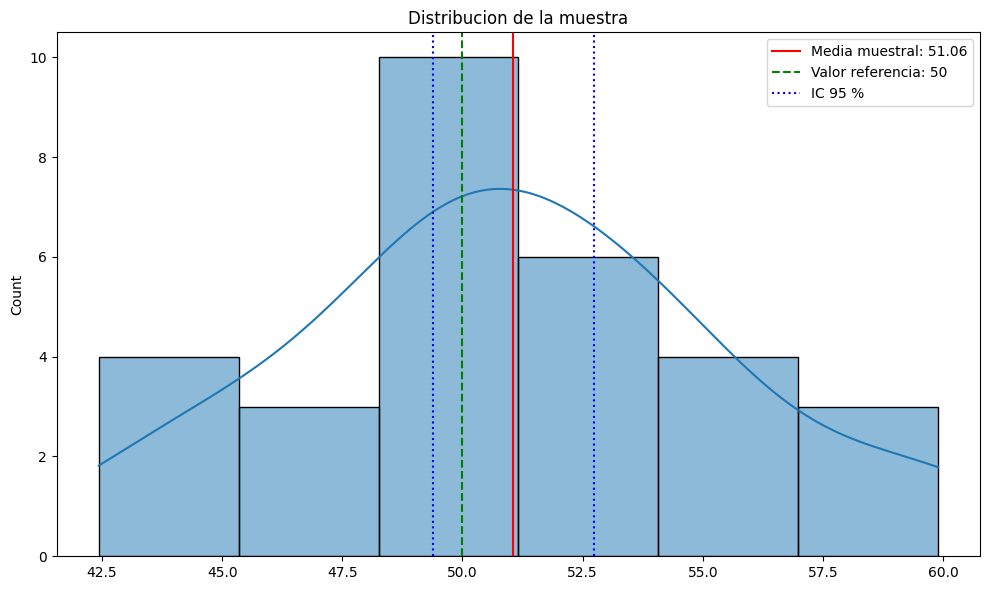

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Reproducibilidad
np.random.seed(42)
# Datos simulados
muestra = np.random.normal(loc=52, scale=5, size=30)
valor_referencia = 50
# Prueba t de una muestra
t_stat, p_value = stats.ttest_1samp(muestra, valor_referencia)
print(f"Estadistico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print("Conclusion:", "La media no es igual al valor de referencia" if p_value < 0.05 else "No se rechaza la hipotesis nula")
# Intervalo de confianza del 95 %
media = np.mean(muestra)
error = stats.sem(muestra)
ic = stats.t.interval(0.95, len(muestra)-1, loc=media, scale=error)
print(f"Media muestral: {media:.2f}")
print(f"IC 95 %: {ic}")
# Visualizacion
plt.figure(figsize=(10, 6))
sns.histplot(muestra, kde=True)
plt.axvline(media, color='red', linestyle='-', label=f'Media muestral: {media:.2f}')
plt.axvline(valor_referencia, color='green', linestyle='--', label=f'Valor referencia: {valor_referencia}')
plt.axvline(ic[0], color='blue', linestyle=':', label='IC 95 %')
plt.axvline(ic[1], color='blue', linestyle=':')
plt.legend()
plt.title('Distribucion de la muestra')
plt.tight_layout()
plt.show()
